In [1]:
from google.colab import drive
drive.mount("/content/Drive")

Mounted at /content/Drive


In [2]:
%cd /content/Drive/MyDrive/

/content/Drive/MyDrive


In [3]:
%cd CNN-CBIR/

/content/Drive/MyDrive/CNN-CBIR


In [ ]:
import os
list_files_query=os.listdir("/content/Drive/MyDrive/CNN-CBIR/data/pg_data/query")

In [ ]:
print(list_files_query)

['all_souls_4_query.txt', 'all_souls_3_query.txt', 'all_souls_1_query.txt', 'all_souls_2_query.txt', 'balliol_3_query.txt', 'ashmolean_5_query.txt', 'balliol_4_query.txt', 'bodleian_1_query.txt', 'balliol_1_query.txt', 'balliol_2_query.txt', 'all_souls_5_query.txt', 'ashmolean_1_query.txt', 'bodleian_2_query.txt', 'bodleian_3_query.txt', 'ashmolean_4_query.txt', 'ashmolean_2_query.txt', 'ashmolean_3_query.txt', 'christ_church_2_query.txt', 'cornmarket_2_query.txt', 'cornmarket_1_query.txt', 'christ_church_1_query.txt', 'christ_church_3_query.txt', 'christ_church_5_query.txt', 'cornmarket_5_query.txt', 'bodleian_5_query.txt', 'cornmarket_3_query.txt', 'bodleian_4_query.txt', 'cornmarket_4_query.txt', 'christ_church_4_query.txt', 'hertford_1_query.txt', 'magdalen_3_query.txt', 'keble_2_query.txt', 'hertford_5_query.txt', 'keble_4_query.txt', 'magdalen_2_query.txt', 'magdalen_1_query.txt', 'magdalen_5_query.txt', 'keble_1_query.txt', 'hertford_4_query.txt', 'hertford_2_query.txt', 'keble_

In [ ]:
data_dir = '/content/Drive/MyDrive/CNN-CBIR/data/pg_data/Images'
query_dir = '/content/Drive/MyDrive/CNN-CBIR/data/pg_data/Queries'

In [ ]:
from cnn_cbir import SearchEngine, FeatureExtractor
from utils import load_image_and_bbs, draw_bbs_to_img
import cv2
import os

fea_extractor = FeatureExtractor(cache_dir='largedata_cache')
search_engine = SearchEngine(data_dir, fea_extractor)
search_engine.build()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

2021-09-22 16:18:15,639 - INFO - building database feature matrix...
2021-09-22 16:18:15,641 - INFO - computing feature for 5063 images...
  0%|          | 0/5063 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|██████████| 5063/5063 [35:00<00:00,  2.41it/s]
2021-09-22 16:53:16,128 - INFO - database feature matrix is computed and saved!


In [ ]:
im_bb_path_tuples = [(os.path.join(query_dir, '{:02d}.jpg'.format(i)),
                      os.path.join(query_dir, '{:02d}.txt'.format(i))
                     ) for i in range(1, 56)
                    ]

/content/Drive/MyDrive/CNN-CBIR/data/pg_data/Queries/01.jpg


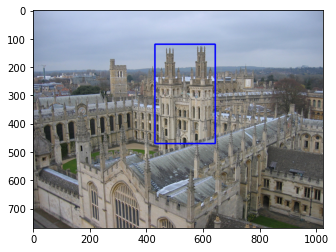

In [ ]:
demo_im_path, demo_bb_path = im_bb_path_tuples[0]
print(demo_im_path)
demo_im, demo_bb = load_image_and_bbs(demo_im_path, demo_bb_path)
draw_bbs_to_img(demo_im, demo_bb)

2021-09-22 16:53:19,158 - INFO - computing bounding box for retrieved 10 images...
100%|██████████| 10/10 [00:00<00:00, 27.51it/s]


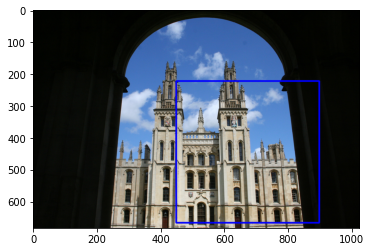

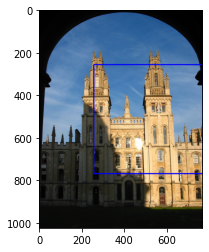

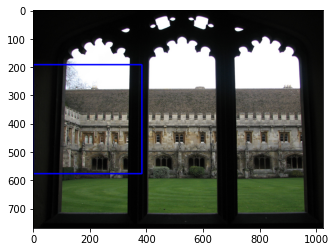

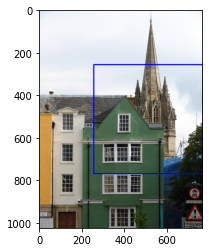

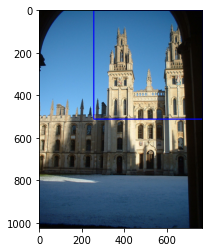

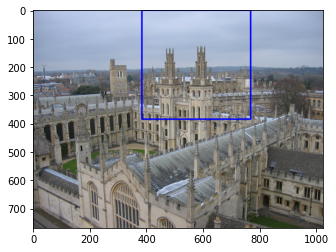

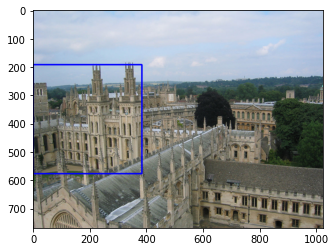

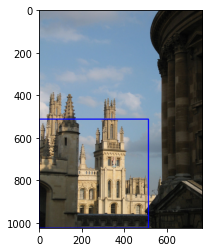

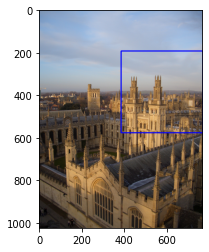

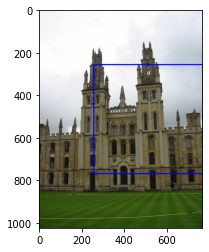

In [ ]:
similar_imgs = search_engine.retrieve_object(demo_im, demo_bb, top_k=10)
for img_path, score, bbs in similar_imgs:
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    draw_bbs_to_img(img, bbs, 'ijhw_mat')

In [ ]:
result_dir = 'result'
os.makedirs(result_dir, exist_ok=True)

In [ ]:
for i, (im_path, bb_path) in enumerate(im_bb_path_tuples[:5], 1):
    im, bb = load_image_and_bbs(im_path, bb_path)
    print(im_path)
    similar_imgs = search_engine.retrieve_object(im, bb, top_k=10)
    save_dir = os.path.join(result_dir, 'Q{:d}'.format(i))
    os.makedirs(save_dir, exist_ok=True)
    # save query image to  path like result/Q1/match_top_0.png
    query_rgb = draw_bbs_to_img(im, bb, mode='return')
    query_bgr = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
    cv2.imwrite(os.path.join(save_dir, 'match_top_0.png'), query_bgr)
    for j, (sim_img_path, sim_score, sim_bbs) in enumerate(similar_imgs, 1):
        sim_img = cv2.cvtColor(cv2.imread(sim_img_path), cv2.COLOR_BGR2RGB)
        sim_img_with_bb = draw_bbs_to_img(sim_img, sim_bbs, 'ijhw_mat', mode='return')
        save_name = 'match_top_{:d}.png'.format(j)
        sim_img_with_bb = cv2.cvtColor(sim_img_with_bb, cv2.COLOR_RGB2BGR)
        cv2.imwrite(os.path.join(save_dir, save_name), sim_img_with_bb)

2021-09-22 16:53:23,998 - INFO - computing bounding box for retrieved 10 images...


/content/Drive/MyDrive/CNN-CBIR/data/pg_data/Queries/01.jpg


100%|██████████| 10/10 [00:00<00:00, 34.55it/s]
2021-09-22 16:53:28,252 - INFO - computing bounding box for retrieved 10 images...


/content/Drive/MyDrive/CNN-CBIR/data/pg_data/Queries/02.jpg


100%|██████████| 10/10 [00:00<00:00, 17.31it/s]
2021-09-22 16:53:33,233 - INFO - computing bounding box for retrieved 10 images...


/content/Drive/MyDrive/CNN-CBIR/data/pg_data/Queries/03.jpg


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]
2021-09-22 16:53:38,376 - INFO - computing bounding box for retrieved 10 images...


/content/Drive/MyDrive/CNN-CBIR/data/pg_data/Queries/04.jpg


100%|██████████| 10/10 [00:01<00:00,  8.36it/s]
2021-09-22 16:53:44,176 - INFO - computing bounding box for retrieved 10 images...


/content/Drive/MyDrive/CNN-CBIR/data/pg_data/Queries/05.jpg


100%|██████████| 10/10 [00:00<00:00, 14.83it/s]


In [ ]:
import pandas as pd
from tqdm import tqdm
import string
import time

DEBUG = False

def im_path_to_id(im_path):
    im_name = os.path.basename(im_path)
    # im_id = int(os.path.splitext(im_name)[0]) # to remove leading zeros
    return str(im_name)

num_imgs = len(os.listdir(data_dir))
print('number of images in database: {:d}'.format(num_imgs))
print('processing queries...')
time.sleep(1) # just to avoid print function to interupt progress bar which makes me uncomfortable

rankfile = os.path.join(result_dir, 'rankList.txt')
with open(rankfile, 'w') as f:
    i = 1
    for (im_path, bb_path) in tqdm(im_bb_path_tuples, disable=DEBUG):
        im, bb = load_image_and_bbs(im_path, bb_path)
        similar_imgs = search_engine.retrieve_object(im, bb, locate=False, top_k=num_imgs)
        line = 'Q{:d}: '.format(i)
        
        # set DEBUG flag to True, compare Q24 output to rank and scores in Section 1.3
        # you will find that the top 10 score and rank are slightly different
        if DEBUG:
            print(line+' '.join([ im_path_to_id(x[0]) for x in similar_imgs[:10] ]))
            print('score: ' + ' '.join([ '{:.4f}'.format(x[1]) for x in similar_imgs[:10] ]))
        line += ' '.join([ im_path_to_id(x[0]) for x in similar_imgs ])
        line +='\n'
        f.writelines(line)
        i += 1

number of images in database: 5063
processing queries...


100%|██████████| 55/55 [00:41<00:00,  1.33it/s]


In [ ]:
def get_file_name(list_files_query, name):
  list_files_name=[]
  for query_file in list_files_query:
    name_correspond= query_file.replace("query",name)
    list_files_name.append(name_correspond)
  return list_files_name

In [ ]:
def get_image_query(list_files_query):
  list_image_query=[]
  for query in list_files_query:
    dir= path_local+"/image_retrieval/gt_files/"+query
    with open(dir,"r") as f:
      for line in f.readlines():
        name_image= line.split(" ")[0].split("_",1)[1]+".jpg"
        list_image_query.append(name_image)
  return list_image_query

In [ ]:
def get_image_correspond(file_name):
  list_image_name= []
  with open("/content/Drive/MyDrive/CNN-CBIR/data/pg_data/gt_files/"+file_name,"r") as f:
    for line in f.readlines():
      list_image_name.append(line.split("\n")[0]+".jpg")
  return list_image_name

In [ ]:
with open("/content/Drive/MyDrive/CNN-CBIR/result/rankList.txt","r") as f:
  a= f.read()
  content=a.split("\n")
  content.remove("")
  print("content", content[-1])

content Q55: oxford_001753.jpg balliol_000194.jpg balliol_000167.jpg pitt_rivers_000087.jpg oxford_002841.jpg balliol_000075.jpg balliol_000051.jpg balliol_000187.jpg oxford_001150.jpg radcliffe_camera_000026.jpg all_souls_000117.jpg oxford_002980.jpg oxford_002955.jpg oxford_001949.jpg oxford_001086.jpg hertford_000121.jpg oxford_003538.jpg oxford_000091.jpg oxford_000236.jpg christ_church_000259.jpg oxford_002319.jpg balliol_000066.jpg radcliffe_camera_000340.jpg oxford_001473.jpg all_souls_000205.jpg all_souls_000095.jpg all_souls_000051.jpg oxford_000741.jpg balliol_000101.jpg magdalen_000998.jpg oxford_001320.jpg oxford_001125.jpg christ_church_001068.jpg christ_church_000998.jpg christ_church_000752.jpg all_souls_000087.jpg magdalen_000058.jpg christ_church_000424.jpg oxford_003161.jpg ashmolean_000036.jpg christ_church_000293.jpg jesus_000309.jpg all_souls_000119.jpg all_souls_000214.jpg radcliffe_camera_000416.jpg christ_church_000928.jpg radcliffe_camera_000439.jpg balliol_000

In [ ]:
len(content)

55

In [ ]:
list_text_img= content[0].split(" ")[1:]
print(list_text_img)

['all_souls_000051.jpg', 'hertford_000039.jpg', 'all_souls_000105.jpg', 'oxford_000478.jpg', 'all_souls_000063.jpg', 'all_souls_000015.jpg', 'all_souls_000146.jpg', 'magdalen_000522.jpg', 'oxford_001940.jpg', 'all_souls_000161.jpg', 'all_souls_000126.jpg', 'all_souls_000066.jpg', 'oxford_001320.jpg', 'all_souls_000117.jpg', 'oxford_002891.jpg', 'all_souls_000002.jpg', 'oxford_000962.jpg', 'magdalen_000519.jpg', 'oxford_003315.jpg', 'oxford_003056.jpg', 'all_souls_000150.jpg', 'all_souls_000065.jpg', 'all_souls_000041.jpg', 'hertford_000112.jpg', 'christ_church_000052.jpg', 'oxford_002985.jpg', 'christ_church_000420.jpg', 'oxford_000091.jpg', 'all_souls_000183.jpg', 'all_souls_000006.jpg', 'christ_church_000643.jpg', 'all_souls_000133.jpg', 'all_souls_000087.jpg', 'all_souls_000214.jpg', 'oxford_002503.jpg', 'all_souls_000134.jpg', 'oxford_001308.jpg', 'magdalen_000476.jpg', 'all_souls_000153.jpg', 'all_souls_000132.jpg', 'all_souls_000055.jpg', 'oxford_002338.jpg', 'all_souls_000091.jp

In [ ]:
list_retrieval= []
for q in content:
    list_text_img= q.split(" ")[1:]
    list_retrieval.append(list_text_img)
len(list_retrieval)

55

In [ ]:
list_ap_name=[]
list_files_name=get_file_name(list_files_query,"good")
for i in range(len(list_files_query)):
    gt=get_image_correspond(list_files_name[i])
    image_correspond = list_retrieval[i]
    index=[]
    AP=0
    for j in range(len(image_correspond)):
      if(image_correspond[j] in gt):
        index.append(j)
    for k in range(len(index)):
      AP= AP+ ((k+1)/(index[k]+1))
    AP=AP/len(gt)
    list_ap_name.append(AP)
map_name=sum(list_ap_name)/len(list_ap_name)

In [ ]:
map_name

0.4599039617303465